How do the spikes in freshness at Race Rocks relate to the local winds and spring/neap tides?

How is the salinity in Malaspina Strait connected to all of this?

In [1]:
import winds
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import netCDF4 as nc
import matplotlib.dates as md
import numpy as np

from salishsea_tools.nowcast import analyze
from salishsea_tools.nowcast import figures
from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
SITES = figures.SITES


## Winds

In [3]:
# Load forcing winds at Sandheads
start = datetime.datetime(2015,6,1)
end = datetime.datetime(2015,8,31)
files = winds.wind_file_names(start, end, '/results/forcing/atmospheric/GEM2.5/operational/', 'ops')
# identify Shandheads grid point
f = nc.Dataset(files[0])
lons =f.variables['nav_lon'][:]-360
lats = f.variables['nav_lat'][:]
j,i=figures.find_model_point(SITES['Sandheads']['lon'], SITES['Sandheads']['lat'], lons, lats)

wind = winds.compile_operational_model(j,i,files)

## NEMO results

In [4]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy = grid.variables['Bathymetry'][:]
lons = grid.variables['nav_lon'][:]
lats = grid.variables['nav_lat'][:]

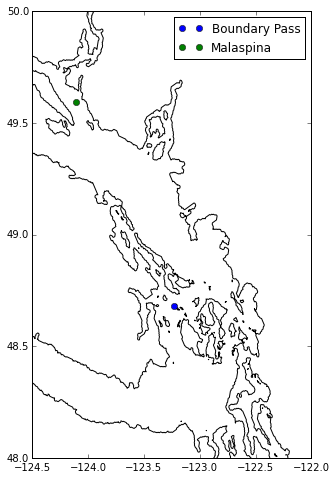

In [6]:
fig,ax=plt.subplots(1,1,figsize=(5,8))
iBP = 250; jBP = 340;
iM = 235; jM = 580


points= {'Boundary Pass': (jBP,iBP),
         'Malaspina': (jM,iM)}
for key in points:
    ax.plot(lons[points[key][0],points[key][1]],
            lats[points[key][0],points[key][1]],
            'o',label=key)
ax.set_xlim([-124.5,-122])
ax.set_ylim([48,50])

viz_tools.plot_coastline(ax, grid, coords='map')
ax.legend(loc=0)

In [7]:
nowcast_dir = '/results/SalishSea/nowcast/'
sals={}
files = analyze.get_filenames(start,end,'1d','grid_T', nowcast_dir)
for key in points:
    sals[key], times = analyze.combine_files(files, 'vosaline',0,points[key][0], points[key][1]) 

(735750.0, 735841.0)

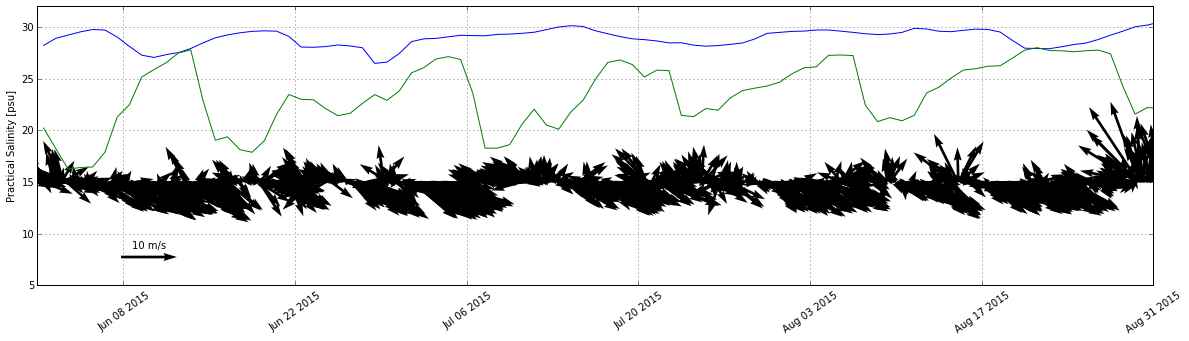

In [8]:
fig,ax = plt.subplots(1,1, figsize=(20,5))

for key in points:
    plt.plot(times, sals[key],label=key)
ax.set_ylim([10,35])
ax.set_ylabel('Practical Salinity [psu]')
plt.setp( ax.xaxis.get_majorticklabels(), rotation=35 )
ax.grid()

ds = md.date2num(list(wind['time']))
q=ax.quiver(md.date2num(list(wind['time'])), 15*np.ones((len(ds),1)),
            wind['u_wind'], wind['v_wind'], scale=200)
ax.quiverkey(q, 0.1,0.1,10,'10 m/s')
ax.set_ylim([5,32])
ax.set_xlim([start, end])

In [9]:
from salishsea_tools import stormtools
tfile = '/data/nsoontie/MEOPAR/tools/SalishSeaTools/salishsea_tools/nowcast/tidal_predictions/Point Atkinson_t_tide_compare8_31-Dec-2013_02-Dec-2015.csv'
ttide,mss = stormtools.load_tidal_predictions(tfile)

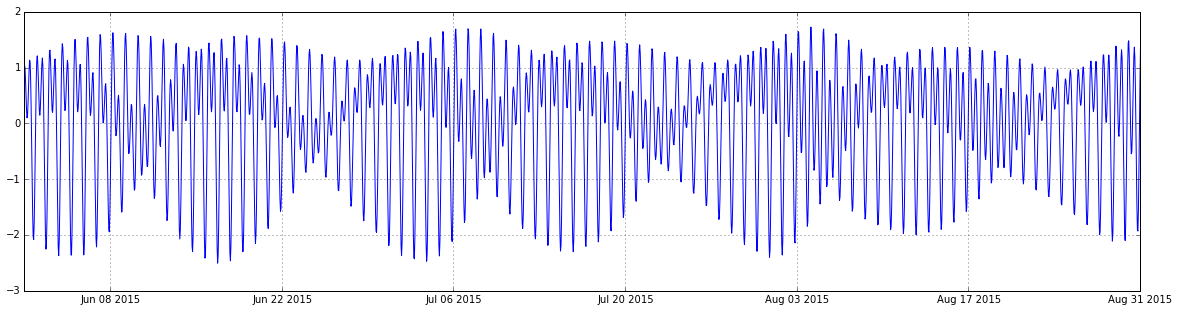

In [10]:
fig,ax=plt.subplots(1,1,figsize=(20,5))
ax.plot(ttide.time, ttide.pred_all)
ax.set_xlim([start, end])
ax.grid()